# Detecção de Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pathlib import Path
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
filepath = Path('datasets', 'bugs_dataset.csv')
data = pd.read_csv(filepath, index_col=0)
data

,n_versions,n_fixes,n_refact,n_authors,lines_added,max_lin_add,avg_lin_add,lines_rem,max_lin_rem,avg_lin_rem,code_churn,max_code_churn,avg_code_churn,age,weighted_age,class
1,65,4,0,8,608,158,935.385,566,158,870.769,42,15,0.646154,350.571,630.609,NO_BUG
2,2,0,0,2,10,10,5.000,0,0,0.000,10,10,5.000000,117.714,0.000,NO_BUG
3,120,10,0,12,1361,99,113.417,768,77,6.400,593,66,494.167000,238.429,104.204,BUG
4,28,4,0,5,138,39,492.857,123,39,439.286,15,23,0.535714,367.000,112.678,NO_BUG
5,93,17,0,8,1870,684,201.075,1881,692,202.258,-11,18,-0.118280,367.000,549.702,NO_BUG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,58,14,0,6,1017,246,175.345,1267,281,218.448,-250,45,-431.034000,367.000,111.411,NO_BUG
994,35,5,0,9,322,48,9.200,156,31,445.714,166,47,474.286000,239.143,586.792,NO_BUG
995,34,5,0,7,690,119,202.941,319,84,938.235,371,89,109.118000,216.000,907.422,BUG
996,3,3,0,1,32,27,106.667,3,2,1.000,29,26,966.667000,657.143,495.536,NO_BUG


In [6]:
X = data.drop('class', axis=1)
y = data['class']

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 1 to 997
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   n_versions      997 non-null    int64  
 1   n_fixes         997 non-null    int64  
 2   n_refact        997 non-null    int64  
 3   n_authors       997 non-null    int64  
 4   lines_added     997 non-null    int64  
 5   max_lin_add     997 non-null    int64  
 6   avg_lin_add     997 non-null    float64
 7   lines_rem       997 non-null    int64  
 8   max_lin_rem     997 non-null    int64  
 9   avg_lin_rem     997 non-null    float64
 10  code_churn      997 non-null    int64  
 11  max_code_churn  997 non-null    int64  
 12  avg_code_churn  997 non-null    float64
 13  age             997 non-null    float64
 14  weighted_age    997 non-null    float64
 15  class           997 non-null    object 
dtypes: float64(5), int64(10), object(1)
memory usage: 132.4+ KB


In [7]:
X.head()

,n_versions,n_fixes,n_refact,n_authors,lines_added,max_lin_add,avg_lin_add,lines_rem,max_lin_rem,avg_lin_rem,code_churn,max_code_churn,avg_code_churn,age,weighted_age
1,65,4,0,8,608,158,935.385,566,158,870.769,42,15,0.646154,350.571,630.609
2,2,0,0,2,10,10,5.000,0,0,0.000,10,10,5.000000,117.714,0.000
3,120,10,0,12,1361,99,113.417,768,77,6.400,593,66,494.167000,238.429,104.204
4,28,4,0,5,138,39,492.857,123,39,439.286,15,23,0.535714,367.000,112.678
5,93,17,0,8,1870,684,201.075,1881,692,202.258,-11,18,-0.118280,367.000,549.702


# Tentando Detectar Anomalias usando Boxplot

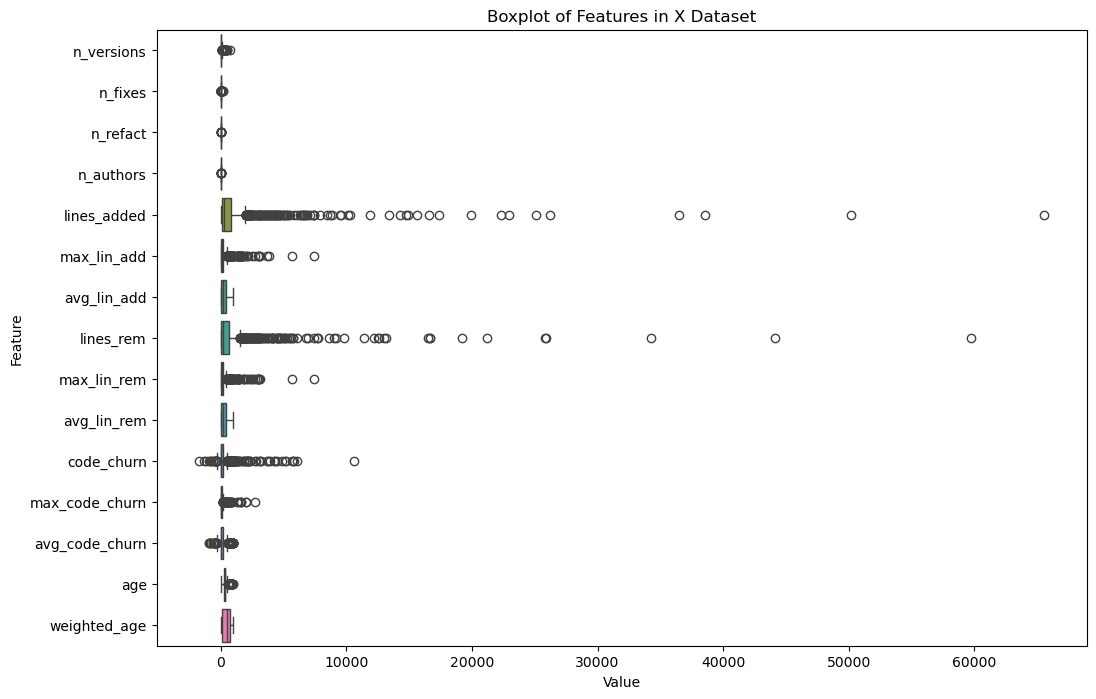

In [11]:
# Plotting a boxplot of the X dataset based on the y_quant quantiles
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient='h')
plt.title('Boxplot of Features in X Dataset')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

In [14]:
boxplot = px.box(X, y='n_refact', title='Boxplot of Number of Refactors', hover_data=X.columns.to_list())
boxplot.show()